## MATH 3020 - Probability and Statistics for Computer Science
### Computer Project
____

**Description:** Twenty computers are connected in a network. One computer becomes infected with a virus. Every day, this virus spreads from any infected computer to any uninfected computer with a probability 0.1. Also, every day, a computer technician takes 5 infected computers at random (or all infected computers, if their numbers is less than 5) and removes the virus from them. Estimate:
+ (a) the expected time it takes to remove the virus from the whole network
+ (b) the probability that each computer gets infected at least once
+ (c) the expected number of computers that get infected

**Theory:**
+ (a) 73 days
+ (b) 0.0012
+ (c) 3 
    

##### Dependencies
____

In [1]:
import numpy as np
import random
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt
import json


%matplotlib inline

sns.set(style="whitegrid")

##### Input Variables
____

In [112]:
computers = 20
infected = 1
prob = 0.1
uninfected = (computers - infected)
#total_days = 2000000
total_days = 10000000
#total_days = 100
tech_threshold = 5

simulations = []

##### Simulation
____

In [104]:
for day in range(total_days):
    computers = 20
    infected = 1
    prob = 0.1
    uninfected = (computers - infected)    
    clear_network = (True if infected == 0 else False)
    
    while (not clear_network):
        spread = sum(np.random.binomial(n=1, p=prob, size=uninfected))        
        infected = infected + spread
        uninfected = uninfected - spread

        # computer technician arrives, finds a new_k number of infected computers
        # if new_k <= 5, clean all of them, and flag that the network is clean
        # else pick randomly any 5 out of the infected new_k and clean them

        if ( infected    <= tech_threshold):
            uninfected    = uninfected + infected
            infected      = 0        
        else:
            uninfected    = uninfected + tech_threshold
            infected      = infected - tech_threshold    
            
        clear_network = (True if infected == 0 else False)

        simulations.append({        
            'day'          : day+1, 
            'computers'    : computers,
            'spread'       : spread,
            'clearNetwork' : (True if infected == 0 else False),
            'infected'     : infected,
            'uninfected'   : uninfected,
            'probability'  : infected/(day+1)
        })        


##### Functions
_____

In [2]:
def setComputerState(network, id, state):
    for item in network:
        if item['_id'] == id:
            item['state'] = state
            
            if state == INFECTED:
                item['infections'] = item['infections'] + 1
                
            break

In [3]:
def changeNetworkState(network, fromState, toState):
    for item in network:
        if item['state'] == fromState:
            item['state'] = toState
            
            #if fromState == INFECTED:
            #    item['infections'] = item['infections'] + 1
            


In [4]:
def totalState(network, state):
    total = 0
    
    for item in network:
        if item['state'] == state:
            total = total + 1
            
    return total

In [68]:
def setRandomState(network, fromState, toState, count):
    total = 0
    
    infected = [item for item in network if item['state'] == fromState]
    #print ('infected list')
    #for item in infected:
    #    print(item)
    
    #for item in random.choices(infected, k=count):
    for item in random.sample(infected, k=count):
        #print (f'fixing item : {item}')
        setComputerState(network, item['_id'], toState)

#### Version 2
____

In [74]:
# constants
CLEAR = 2
INFECTED = 1
UNINFECTED = 0

# variables setup
computers = 20
initial_infection = 1
prob = 0.1
tech_threshold = 3
total_simulations = 1
simulations = []

# initial simulation
for day in range(total_simulations):
    
    # construct network
    network = [{'_id' : id, 'state' : UNINFECTED, 'infections': 0} for id in range(0, computers)]
    clear_network = False

    # initial infection (random)
    for _ in range(initial_infection):
        setComputerState(network, random.randrange(0, len(network), step=1), INFECTED)
        initial_spread=True
        spread = 1
    
    # dayly work
    while (not clear_network):
        # spread the virus across uninfected computers
        if (initial_spread) == True:
            initial_spread = False
        else:
            spread = 0
        
        for item in network:
            if (item['state'] == UNINFECTED):
                if (np.random.binomial(n=1, p=prob, size=1)[0]) == INFECTED:
                    setComputerState(network, item["_id"], INFECTED)
                    spread = spread + 1
                    
            #elif (item['state'] == CLEAR): # might get the virus again                
            #    if (np.random.binomial(n=1, p=prob, size=1)[0]) == INFECTED:
            #         setComputerState(network, item["_id"], INFECTED)                    
            
        # computer technician arrives, finds a new_k number of infected computers
        total_infected = totalState(network, INFECTED)
    
        if (total_infected <= tech_threshold):
            #if new_k <= 5, clean all of them, and flag that the network is clean
            changeNetworkState(network, INFECTED, CLEAR)
            clear_network = True
        
        else:
            #pick randomly any 5 out of the infected new_k and clean them
            setRandomState(network, INFECTED, CLEAR, tech_threshold)                
    
        # save results    
        simulations.append({        
                'simulation'   : day+1,
                'spread'       : spread,
                #'infected'     : totalState(network, INFECTED),
                'recover'      : totalState(network, CLEAR),
                'uninfected'   : totalState(network, UNINFECTED)            
        })
        
    #for item in network:
    #    print (item)
    
    

In [77]:
summary = pd.DataFrame(data=simulations, columns=list(simulations[0].keys()))

summary
#summary.groupby(by='spread').count()
#summary.groupby(by='spread').count()

#g = summary.groupby(by='simulation').count()
#cond = g['spread'] > 1
#g[cond]

#cond = summary['simulation'] == 77
#summary[cond]


,simulation,spread,recover,uninfected
0,1,4,3,16
1,1,1,5,15


##### Results
_____

In [89]:
cond = summary['spread'] == 0
summary[cond]

#summary.groupby(by='infected').count()

,simulation,spread,infected,uninfected
3,3,0,6,14


In [324]:
cond = summary['infected'] >= 1
p = summary[cond]['infected'].sum()/total_simulations

expected_time = (computers/tech_threshold) * p * computers

print(f"The expected time it takes to remove the virus from the whole network : {int(expected_time)} day(s)")

The expected time it takes to remove the virus from the whole network : 224 day(s)


In [325]:
cond = summary['infected'] >= 1
p = summary[cond]['infected'].sum()/total_simulations

print(f"The probability that each computer gets infected at least once : {p}")

The probability that each computer gets infected at least once : 2.8


In [326]:
cond = summary['infected'] >= 1
p = summary[cond]['infected'].sum()/total_simulations

expected_computers = [p*i for i in range(1, computers+1)]

print(f"The expected number of computers that get infected : {math.ceil(sum(expected_computers))}")

The expected number of computers that get infected : 588


In [113]:
total_clear_network = 0
total_not_clear_network = 0

for day in range(total_days):
    
    # for each connection "infected -> noninfected" you use a Bernoulli trial (with probability of success p=0.1) to determine if this nonifected computer will become infected
    spread = sum(np.random.binomial(n=1, p=prob, size=uninfected))        
    infected = infected + spread
    uninfected = uninfected - spread
    
    # computer technician arrives, finds a new_k number of infected computers
    # if new_k <= 5, clean all of them, and flag that the network is clean
    # else pick randomly any 5 out of the infected new_k and clean them
    
    if ( infected    <= tech_threshold):
        uninfected    = uninfected + infected
        infected      = 0
        total_clear_network = total_clear_network + 1
    else:
        uninfected    = uninfected + tech_threshold
        infected      = infected - tech_threshold
        total_not_clear_network = total_not_clear_network + 1
   
    simulations.append({        
        'day'          : day+1, 
        'computers'    : computers,
        'spread'       : spread,
        'clearNetwork' : (True if infected == 0 else False),
        'infected'     : infected,
        'uninfected'   : uninfected,
        'p_clear'      : total_clear_network/(day+1),
        'p_not_clear'  : total_not_clear_network/(day+1)
    })       

##### Results
____

In [114]:
summary = pd.DataFrame(data=simulations, columns=list(simulations[0].keys()))

In [115]:
#cond = summary['infected'] == 0
cond = summary['clearNetwork'] == True
p = summary[cond]['infected'].count()/total_days
expected_time = (computers/tech_threshold) * p * computers

print(f"The expected time it takes to remove the virus from the whole network : {int(expected_time)} day(s)")

The expected time it takes to remove the virus from the whole network : 79 day(s)


In [116]:
#cond = summary['infected'] >= 1
cond = summary['clearNetwork'] == False
print(f"The probability that each computer gets infected at least once : {summary[cond]['infected'].count()/total_days}")

The probability that each computer gets infected at least once : 0.0117651


In [117]:
#cond = summary['infected'] >= 1
cond = summary['clearNetwork'] == False
p = summary[cond]['infected'].count()/total_days

expected_computers = [p*i for i in range(1, computers+1)]

print(f"The expected number of computers that get infected : {math.ceil(sum(expected_computers))}")

The expected number of computers that get infected : 3


##### Visualizations
____

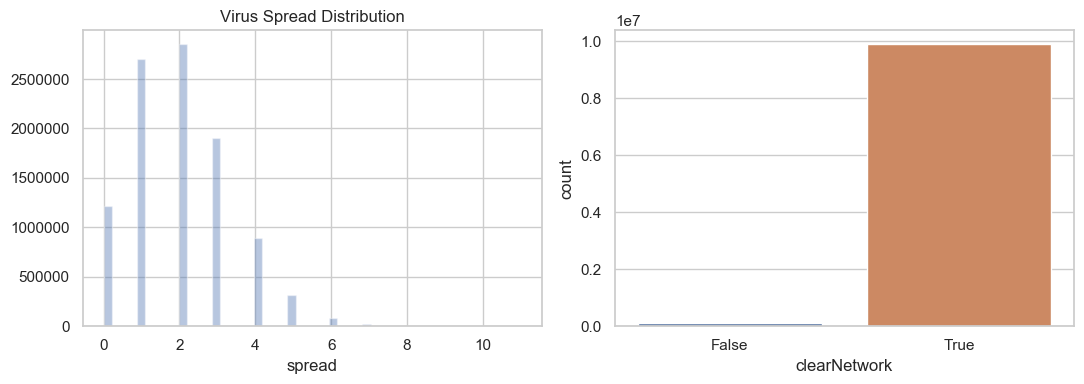

In [102]:
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(11,4), dpi=100)

axes[0].set_title('Virus Spread Distribution')

sns.distplot(summary['spread'], kde=False,ax=axes[0]);
sns.countplot(x="clearNetwork", data=summary, ax=axes[1])

plt.tight_layout()

In [94]:
summary

,day,computers,spread,clearNetwork,infected,uninfected,p_clear,p_not_clear
0,1,20,2,True,0,20,1.000000,0.000000
1,2,20,0,True,0,20,1.000000,0.000000
2,3,20,0,True,0,20,1.000000,0.000000
3,4,20,1,True,0,20,1.000000,0.000000
4,5,20,4,True,0,20,1.000000,0.000000
...,...,...,...,...,...,...,...,...
95,96,20,0,True,0,20,0.968750,0.031250
96,97,20,1,True,0,20,0.969072,0.030928
97,98,20,3,True,0,20,0.969388,0.030612
98,99,20,2,True,0,20,0.969697,0.030303


In [111]:
cond = summary['clearNetwork'] == False
summary[cond]['infected'].count()

374819

In [404]:
cond = summary['infected'] == 0
summary[cond]['infected'].count()

1976382

In [405]:
cond = summary['clearNetwork'] == True
summary[cond]['infected'].count()

1976382

In [458]:
total_days

2000000

In [459]:
total_days*0.2

400000.0

In [ ]:
2000000 
400000.0

In [345]:
    #expected_comp = 0

for i in range(1, computers+1):
    expected_comp = expected_comp + i * 0.0119845
#    cond = summary['infected'] == i    
#    expected_comp = expected_comp + i * (summary[cond]['infected'].count()/total_days)
    
    
    #print(expected_comp)

    
#cond = summary['infected'] == 1
#(summary[cond]['infected'].count()/total_days)


#(0.0119845/2)*computers

print(expected_comp)



5.0334900000000005


In [120]:


np.random.binomial(n=1, p=0.1, size=19)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Help on built-in function binomial:

binomial(...) method of numpy.random.mtrand.RandomState instance
    binomial(n, p, size=None)
    
    Draw samples from a binomial distribution.
    
    Samples are drawn from a binomial distribution with specified
    parameters, n trials and p probability of success where
    n an integer >= 0 and p is in the interval [0,1]. (n may be
    input as a float, but it is truncated to an integer in use)
    
    .. note::
        New code should use the ``binomial`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    n : int or array_like of ints
        Parameter of the distribution, >= 0. Floats are also accepted,
        but they will be truncated to integers.
    p : float or array_like of floats
        Parameter of the distribution, >= 0 and <=1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * 

#### Functions
____

In [55]:
def bernoulli(p):
    random_number = random.random()
    
    return (1 if random_number <= p else 0)

In [31]:
def binomial(n_trials, p):
    trials = [bernoulli(p) for i in range(n_trials)]
    return sum(trials)

#### Model
____

In [51]:
###
###
### spread the virus random accross all uninfected computers
### take 5 random computers and remove the virus
### count (total_infected, total_uninfected)

# everyday
    # step 1 : (virus spread) to any unfected computer (bernoulli(p) and pick a random computer)
    # step 2 : take 5 random computers and remove the virus
    # count (total_infected, total_uninfected, total_removed) per day
    # days : loop
    

#np.random.binomial(n=1, p=0.1, size=19)


bernoulli(0.1)


1

In [22]:
np.random.binomial(n=1, p=0.1, size=19)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [174]:
total = []

for _ in range(iterations):
    total.append(binomial(n_trials, p))   


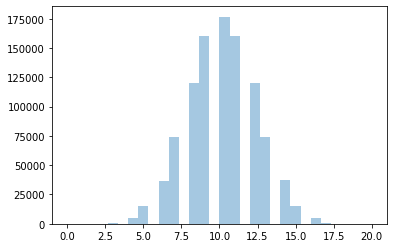

In [180]:
sns.distplot(total, kde=False, bins=30);

In [144]:
3/200

0.015